## About Dataset
## Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

## Can you predict if the customer is going to honor the reservation or cancel it ?

## About this file
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

## Data Dictionary

Booking_ID: unique identifier of each booking
no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pl.read_csv("Hotel Reservations.csv")
data = pd.read_csv("Hotel Reservations.csv")

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
data.shape

(36275, 19)

In [6]:
# get the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# check null values in data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
# check duplicet values in data
data.duplicated().sum()

0

In [9]:
# saprate numerical columns and catigorical columnbs
catigorical_featurs = data.select_dtypes(include="object").columns
numerical_featurs = data.select_dtypes(exclude="object").columns
print(catigorical_featurs)
print(numerical_featurs)

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [10]:
# check unique values in catigorical features
for i in catigorical_featurs:
    print(i,data[i].unique())
    print("="*50)

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status ['Not_Canceled' 'Canceled']


In [11]:
# check value caount  in catigorical features
for i in catigorical_featurs:
    print(i,data[i].value_counts())
    print("="*50)

Booking_ID Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
type_of_meal_plan type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


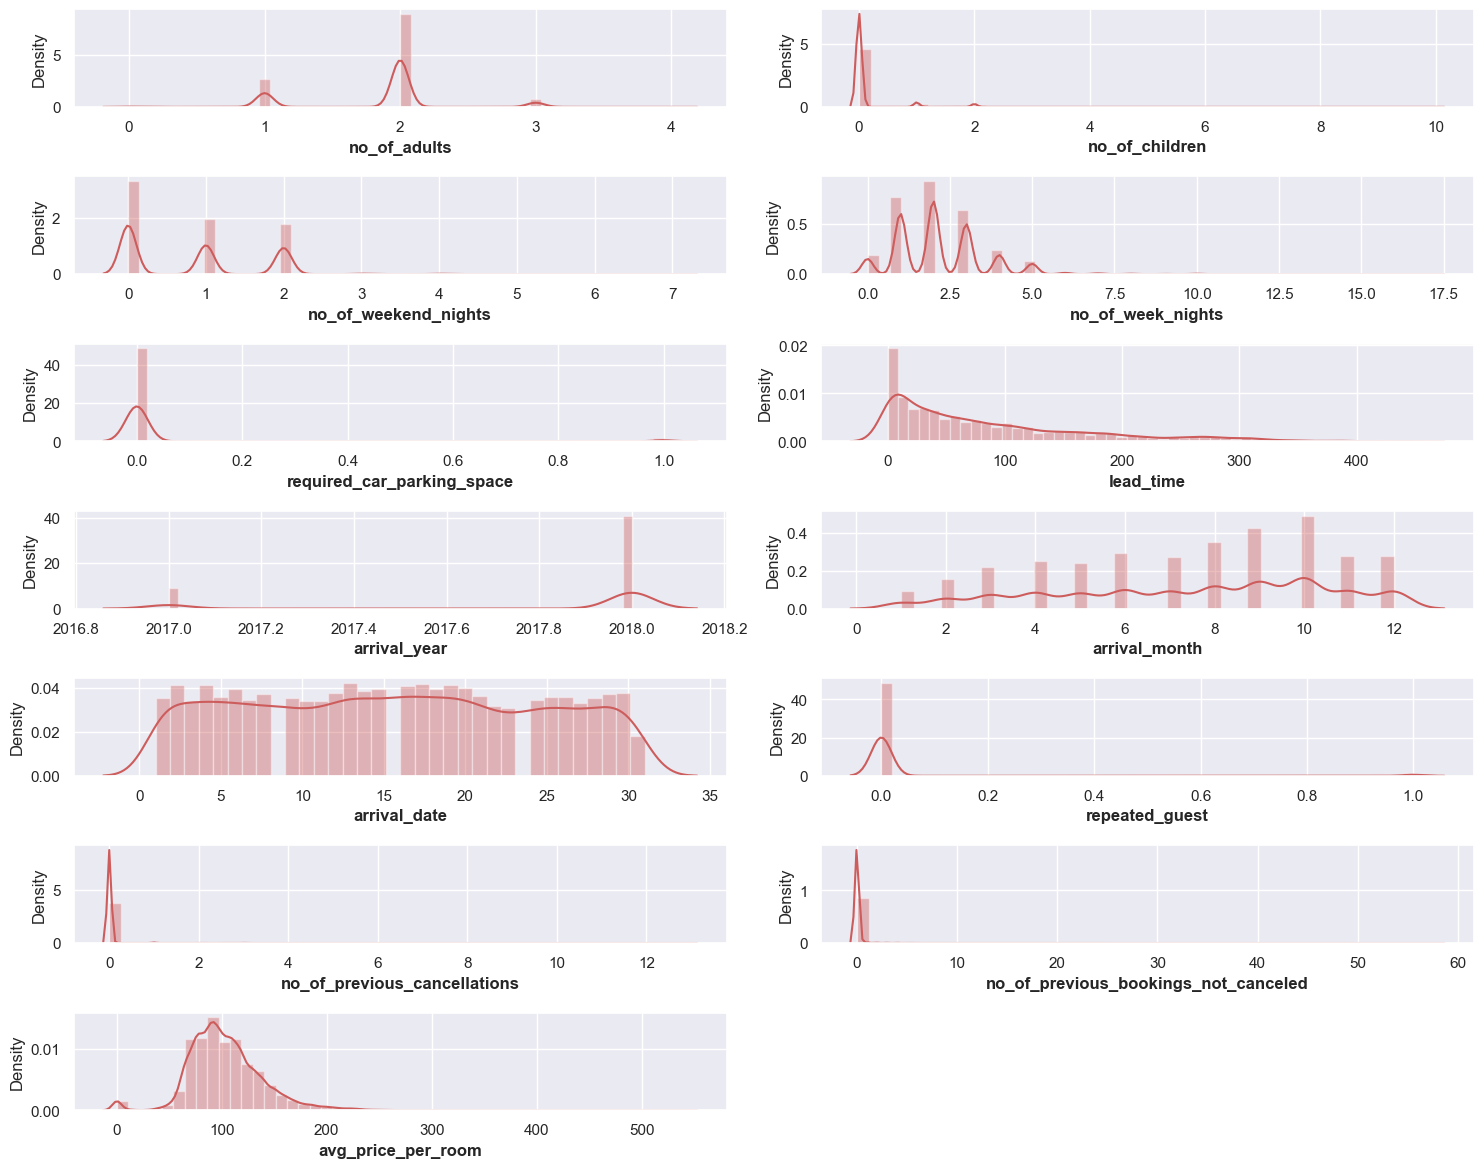

In [12]:
# check diatribution of all numerical columns
plt.figure(figsize=(15, 100))

for i, col in enumerate(numerical_featurs[0:13]):
    plt.subplot(60, 2, i+1)
    sns.distplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


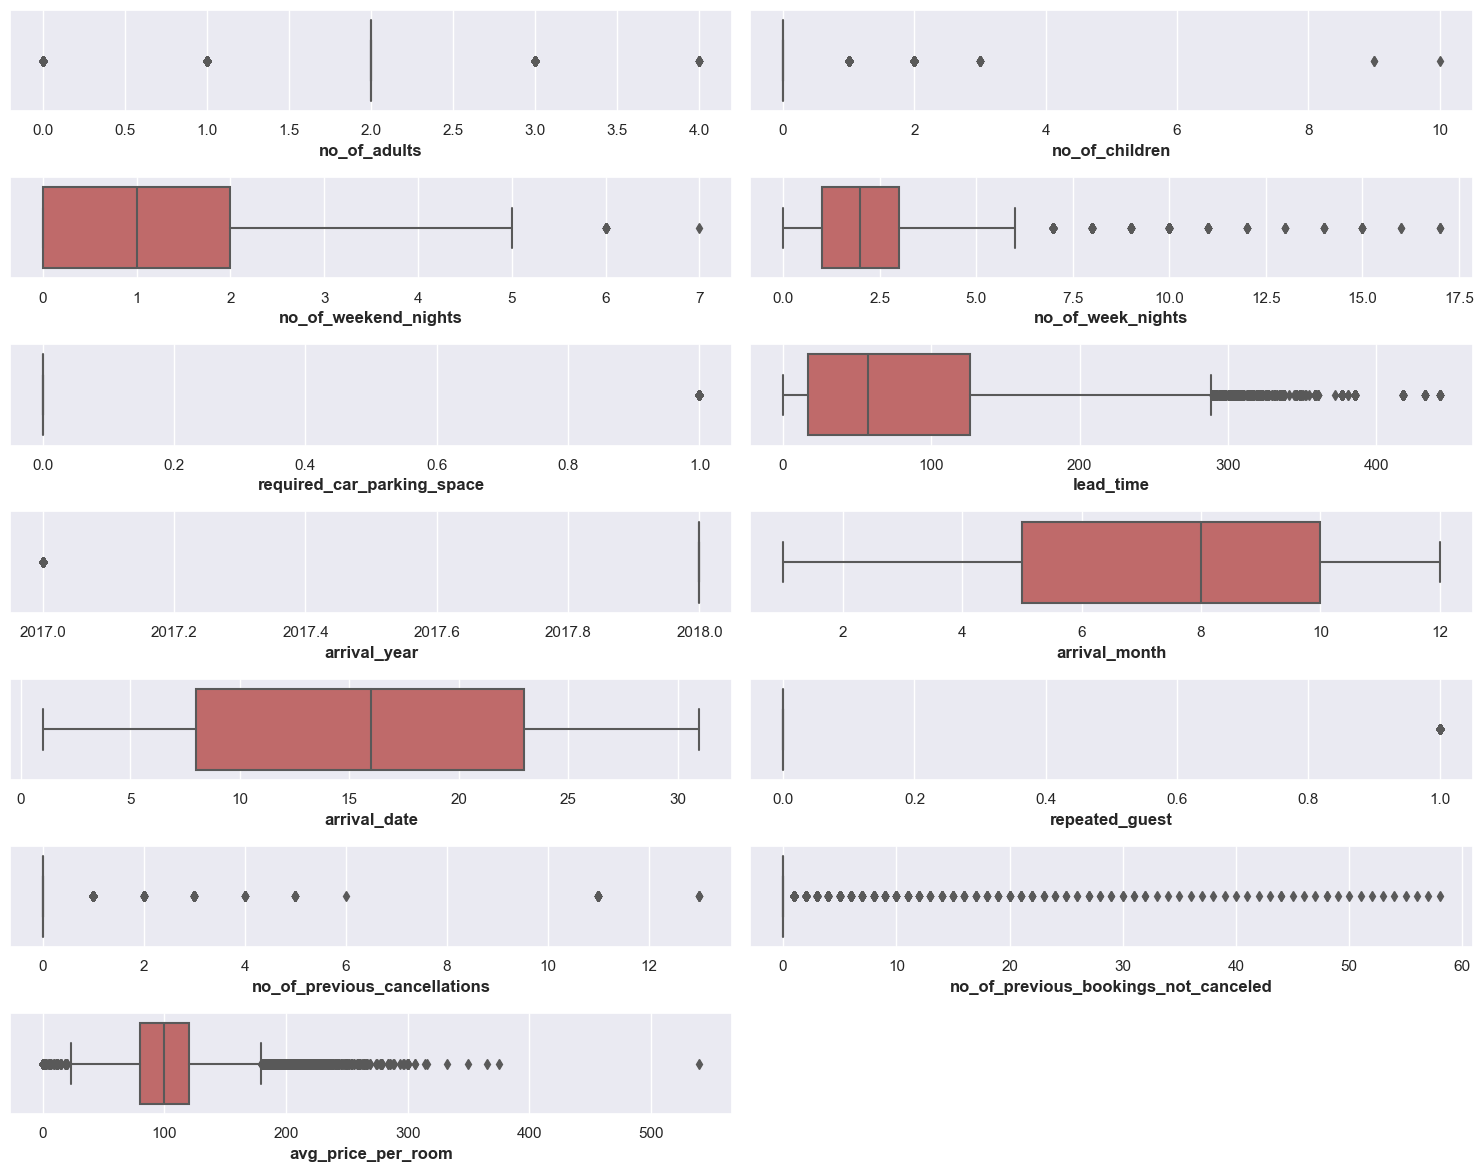

In [13]:
# check outlayers using boxplot of all numerical columns
plt.figure(figsize=(15, 100))

for i, col in enumerate(numerical_featurs[0:13]):
    plt.subplot(60, 2, i+1)
    sns.boxplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

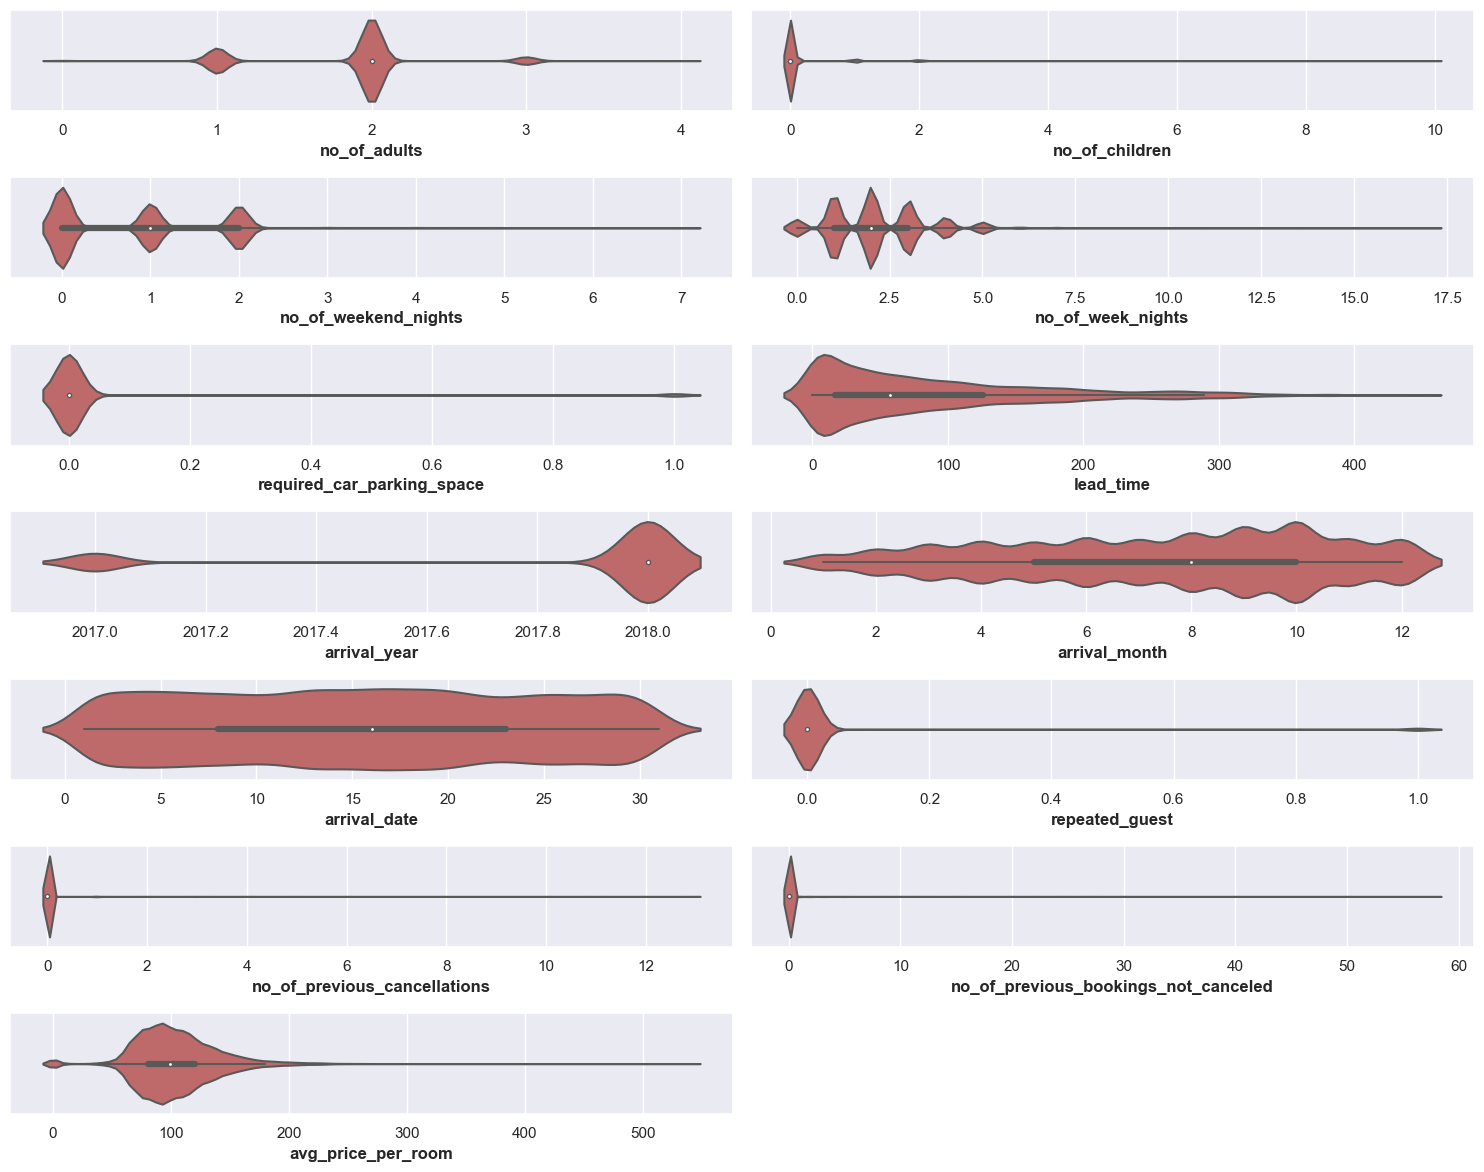

In [14]:

plt.figure(figsize=(15, 100))

for i, col in enumerate(numerical_featurs[0:13]):
    plt.subplot(60, 2, i+1)
    sns.violinplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

<Axes: xlabel='no_of_adults'>

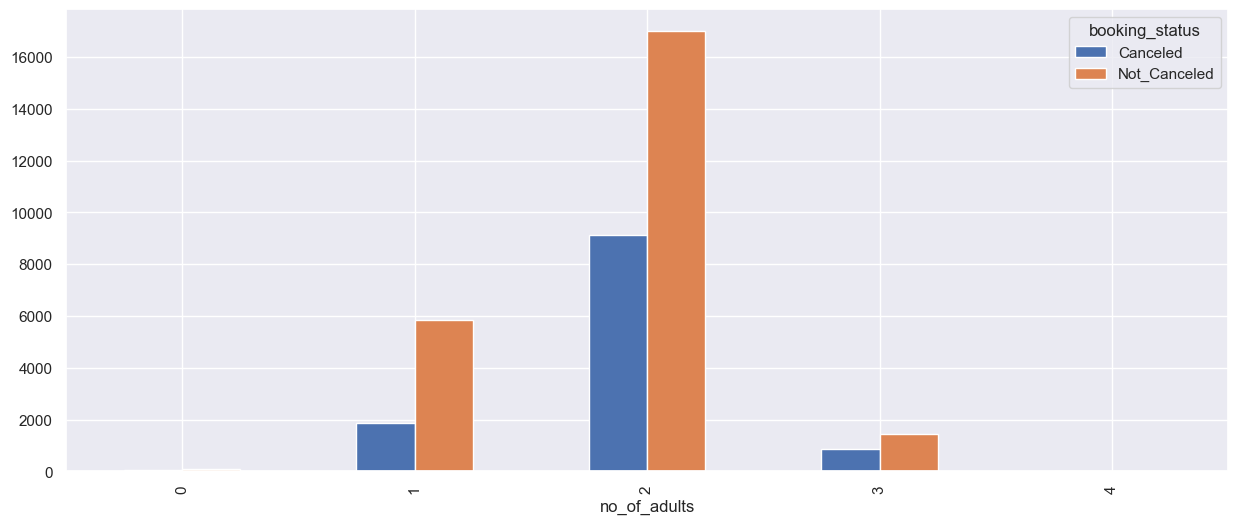

In [15]:
adults = pd.crosstab(data["no_of_adults"],data["booking_status"])
adults.plot(kind="bar")

<Axes: xlabel='no_of_children'>

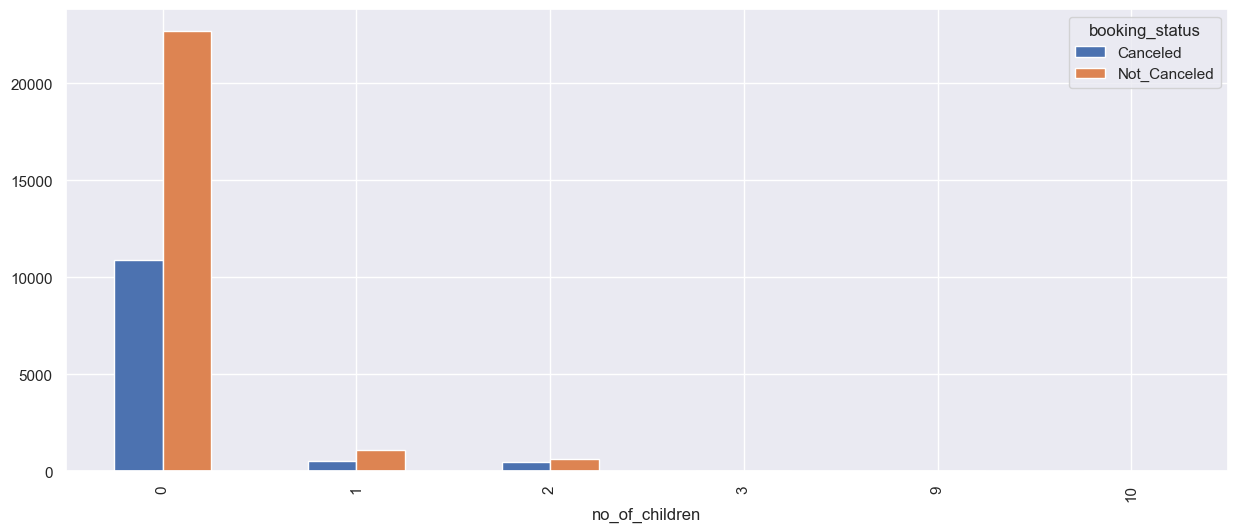

In [16]:
no_of_children = pd.crosstab(data["no_of_children"],data["booking_status"])
no_of_children.plot(kind="bar")

<Axes: xlabel='no_of_weekend_nights'>

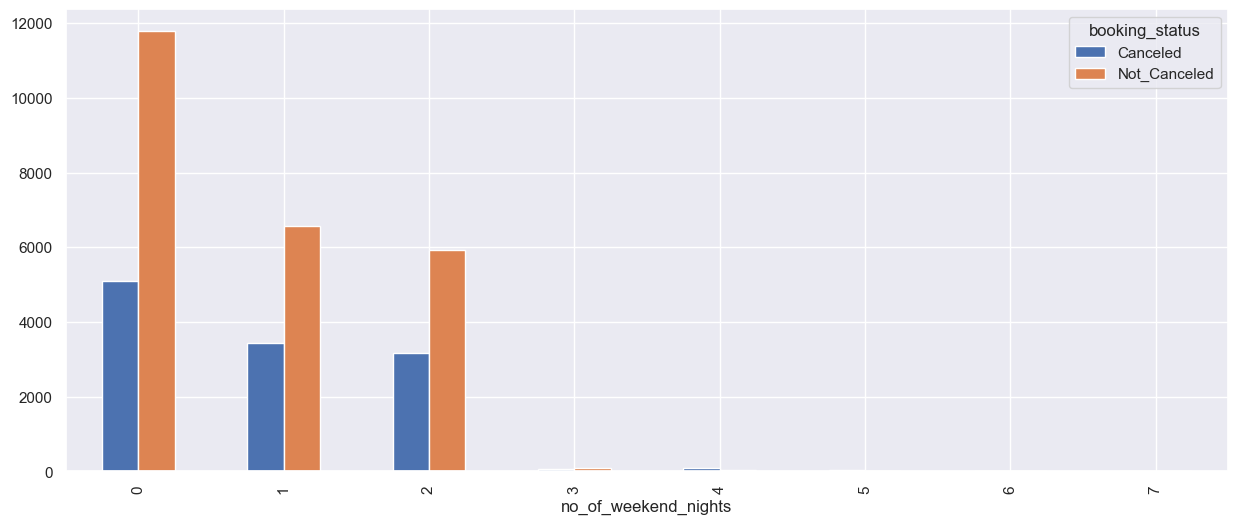

In [17]:
no_of_weekend_nights = pd.crosstab(data["no_of_weekend_nights"],data["booking_status"])
no_of_weekend_nights.plot(kind="bar")

<Axes: xlabel='no_of_week_nights'>

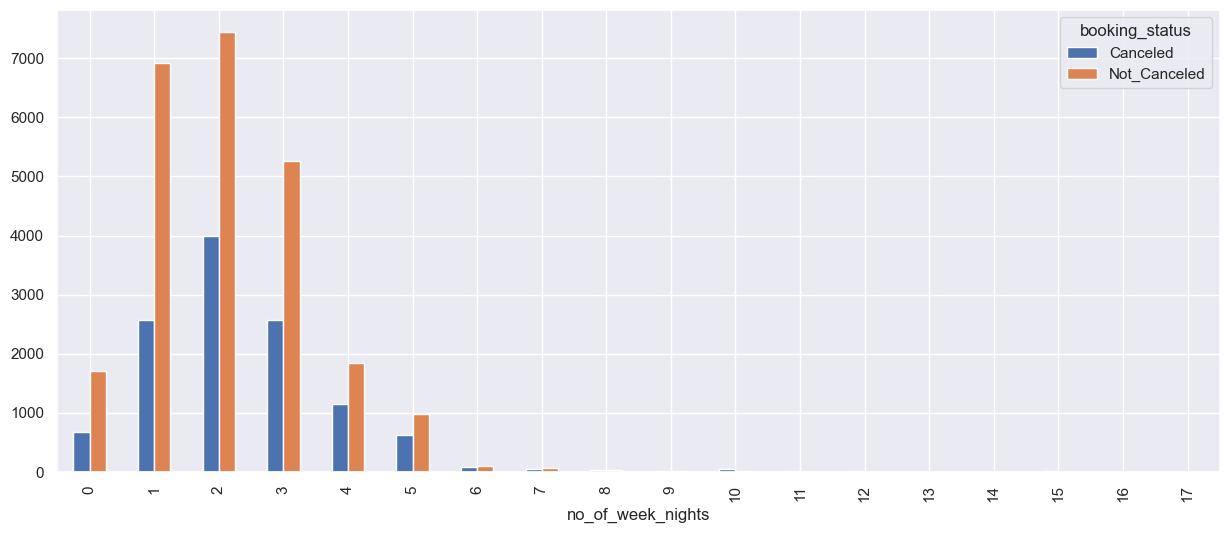

In [18]:
no_of_week_nights = pd.crosstab(data["no_of_week_nights"],data["booking_status"])
no_of_week_nights.plot(kind="bar")

<Axes: xlabel='type_of_meal_plan'>

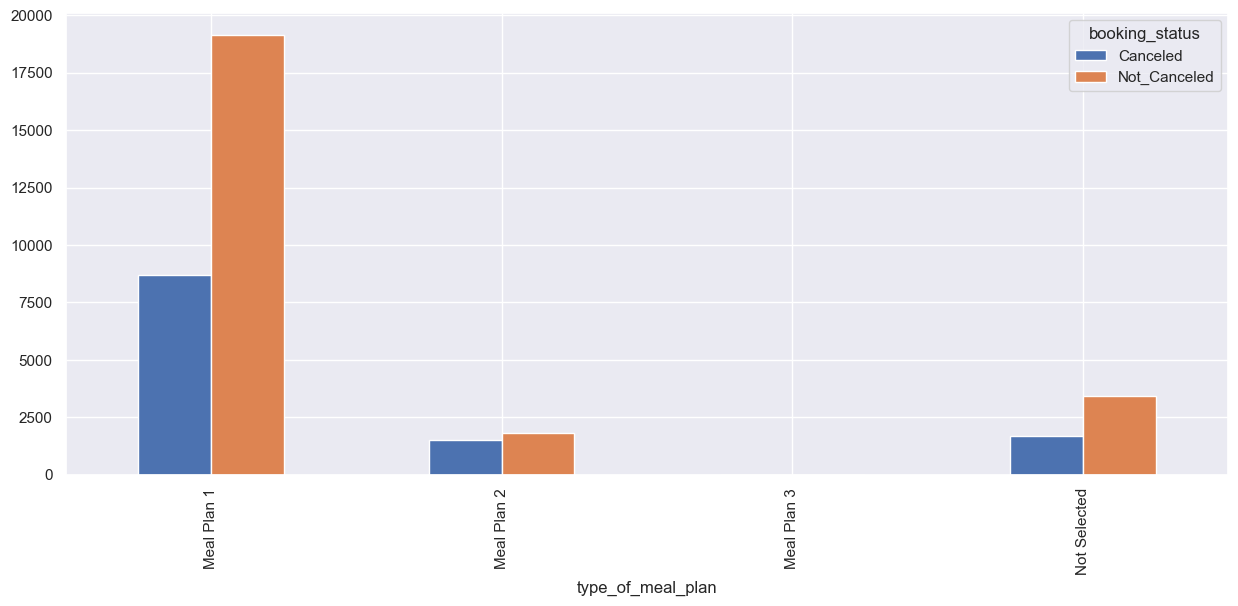

In [19]:
type_of_meal_plan = pd.crosstab(data["type_of_meal_plan"],data["booking_status"])
type_of_meal_plan.plot(kind="bar")

<Axes: xlabel='room_type_reserved'>

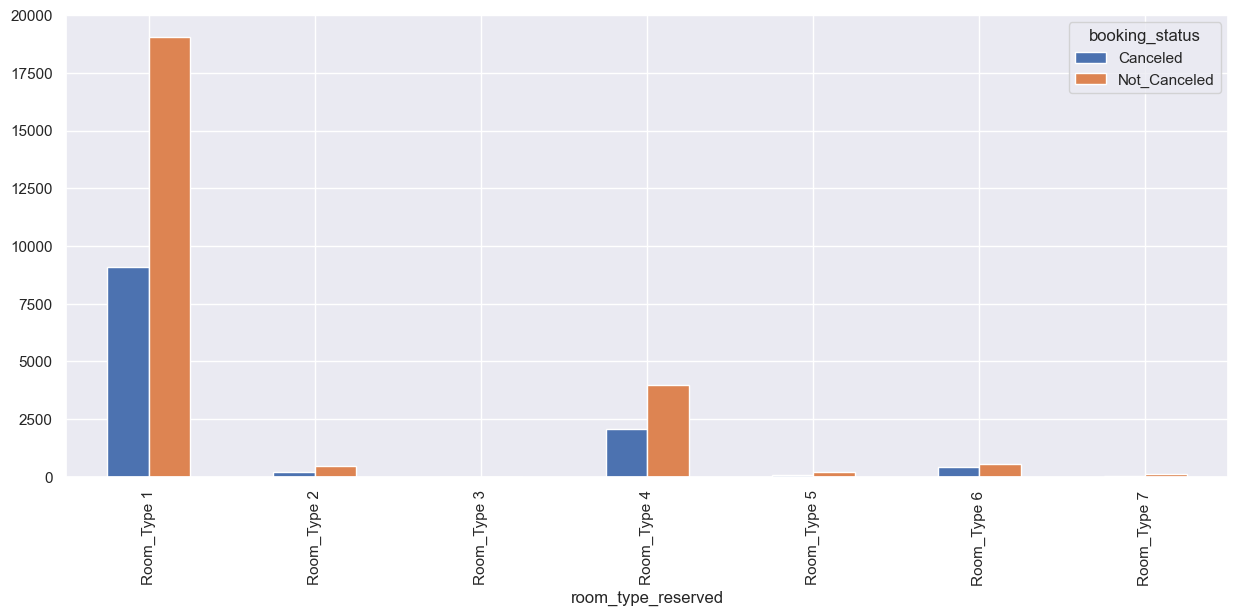

In [20]:
room_type_reserved = pd.crosstab(data["room_type_reserved"],data["booking_status"])
room_type_reserved.plot(kind="bar")

<Axes: xlabel='market_segment_type'>

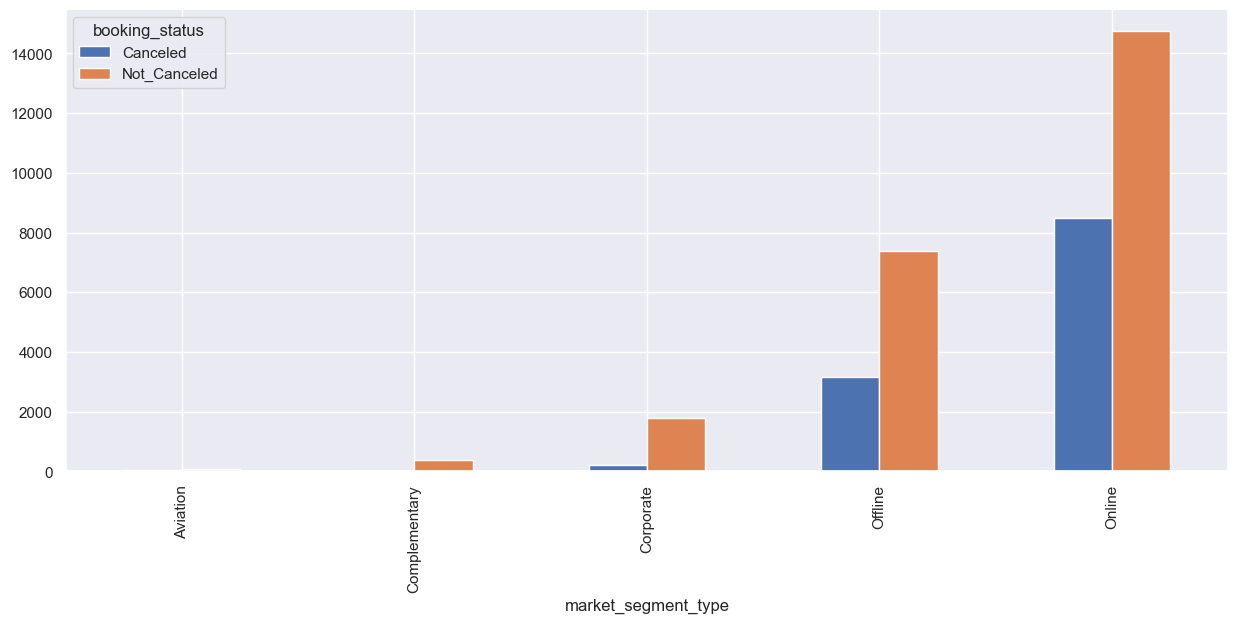

In [21]:
market_segment_type = pd.crosstab(data["market_segment_type"],data["booking_status"])
market_segment_type.plot(kind="bar")

<Axes: ylabel='count'>

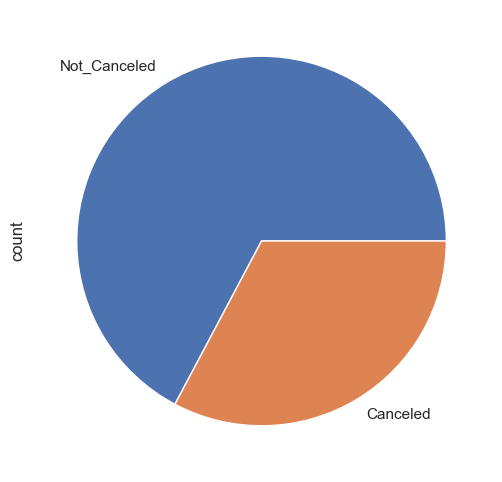

In [22]:
data["booking_status"].value_counts().plot.pie()

In [23]:
data.drop("Booking_ID",axis=1,inplace=True)

In [24]:
# saprate numerical columns and catigorical columnbs
catigorical_featurs = data.select_dtypes(include="object").columns
numerical_featurs = data.select_dtypes(exclude="object").columns
print(catigorical_featurs)
print(numerical_featurs)

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [25]:
# convert catigorical data in to numeric data
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()

for i in catigorical_featurs:
    lable.fit(data[i])
    data[i] = lable.fit_transform(data[i])

<Axes: >

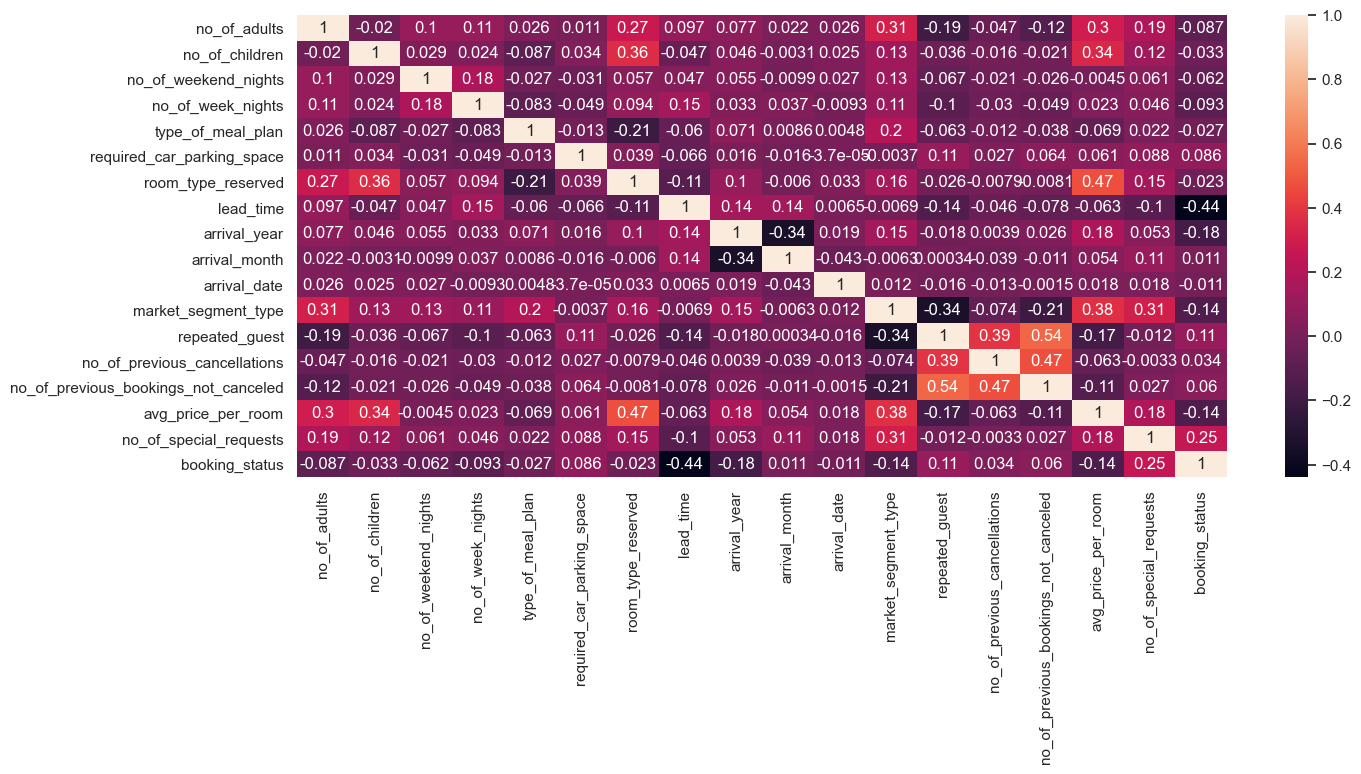

In [26]:
sns.heatmap(data.corr(),annot=True)

In [27]:
# drop unwanted columns
data.drop(["no_of_weekend_nights","no_of_week_nights","lead_time","arrival_year","arrival_date"],axis=1,inplace=True)

## Model Traning

In [28]:
data

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,0,0,10,3,0,0,0,65.00,0,1
1,2,0,3,0,0,11,4,0,0,0,106.68,1,1
2,1,0,0,0,0,2,4,0,0,0,60.00,0,0
3,2,0,0,0,0,5,4,0,0,0,100.00,0,0
4,2,0,3,0,0,4,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,0,0,3,8,4,0,0,0,167.80,1,1
36271,2,0,0,0,0,10,4,0,0,0,90.95,2,0
36272,2,0,0,0,0,7,4,0,0,0,98.39,2,1
36273,2,0,3,0,0,4,4,0,0,0,94.50,0,0


In [29]:
x = data.drop("booking_status",axis=1)
y = data["booking_status"]

In [30]:
# saprate numerical columns and catigorical columnbs
catigorical_featurs = x.select_dtypes(include="object").columns
numerical_featurs = x.select_dtypes(exclude="object").columns
print(catigorical_featurs)
print(numerical_featurs)

Index([], dtype='object')
Index(['no_of_adults', 'no_of_children', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_featurs)
])

In [33]:
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(x, y)

In [34]:
print(X_res.shape)
print(y_res.shape)

(48094, 12)
(48094,)


In [35]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res, y_res,test_size=0.20,random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38475, 12)
(9619, 12)
(38475,)
(9619,)


In [37]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [41]:
## Logastic regression
logastic = LogisticRegression()
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10,10.1],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [42]:
grid_search = GridSearchCV(logastic,param_grid=params,cv=5)

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10.1],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [44]:
grid_search.score(X_train,y_train)

0.6932033788174139

In [45]:
y_predict = grid_search.predict(X_test)

In [46]:
accuracy_score(y_predict,y_test)

0.6991371244412101

In [47]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5097
           1       0.67      0.71      0.69      4522

    accuracy                           0.70      9619
   macro avg       0.70      0.70      0.70      9619
weighted avg       0.70      0.70      0.70      9619



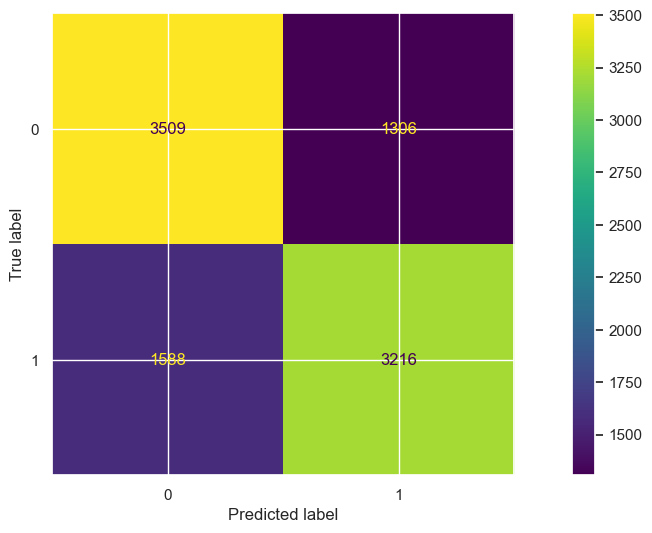

In [50]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [67]:
## Random Forest
forest = RandomForestClassifier()
params = {
    "n_estimators":[150,200],
    "criterion":["gini","entropy"],
    'max_depth': [8,10,15],
    'min_samples_split':[2, 3,5],
    "min_samples_leaf":[2,3,4]
}

In [68]:
random_search = RandomizedSearchCV(forest,params,cv=5)

In [69]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 10, 15],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [150, 200]})

In [70]:
random_search.score(X_train,y_train)

0.8279662118258609

In [71]:
y_predict = random_search.predict(X_test)

In [72]:
accuracy_score(y_predict,y_test)

0.8148456180476141

In [73]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      4724
           1       0.82      0.81      0.82      4895

    accuracy                           0.81      9619
   macro avg       0.81      0.81      0.81      9619
weighted avg       0.82      0.81      0.81      9619



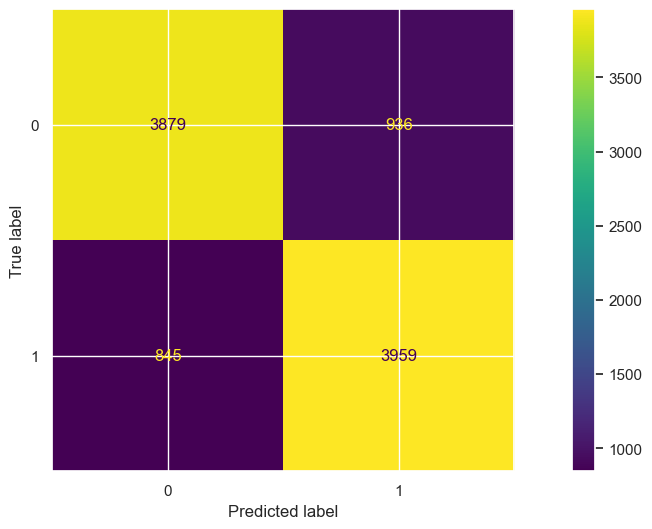

In [74]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [78]:
## DEcision Tree
tree = DecisionTreeClassifier()
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,7,10],
    "min_samples_split":[3,4,5,6,7,8],
    "min_samples_leaf":[1,2,3,4,5,6],
    "max_features":["auto","sqrt","log2"]
}

In [79]:
random_search = RandomizedSearchCV(tree,params,cv=5)

In [80]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8],
                                        'splitter': ['best', 'random']})

In [81]:
random_search.score(X_train,y_train)

0.7422222222222222

In [82]:
y_predict = random_search.predict(X_test)

In [83]:
accuracy_score(y_predict,y_test)

0.7440482378625637

In [84]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5053
           1       0.72      0.76      0.74      4566

    accuracy                           0.74      9619
   macro avg       0.74      0.74      0.74      9619
weighted avg       0.75      0.74      0.74      9619



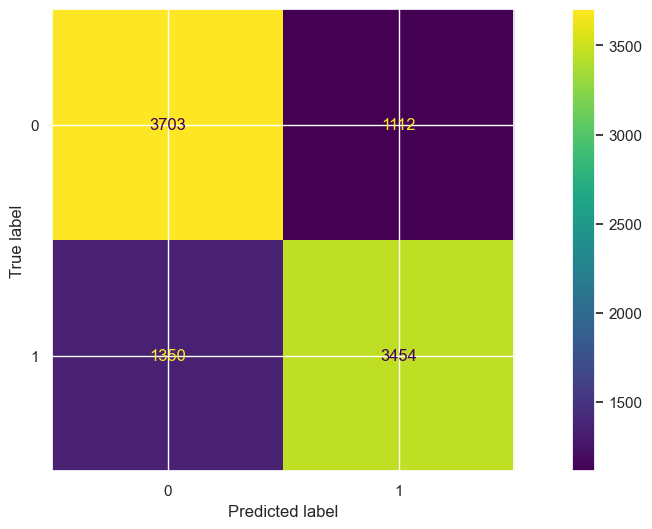

In [85]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [86]:
# Extra tree 
extratree = ExtraTreeClassifier()
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,7,10],
    "min_samples_split":[3,4,5,6,7,8],
    "min_samples_leaf":[1,2,3,4,5,6],
    "max_features":["auto","sqrt","log2"]
}

In [87]:
random_search = RandomizedSearchCV(extratree,params,cv=5)

In [88]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreeClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8],
                                        'splitter': ['best', 'random']})

In [89]:
random_search.score(X_train,y_train)

0.7222871994801819

In [90]:
y_predict = random_search.predict(X_test)

In [91]:
accuracy_score(y_predict,y_test)

0.7228402120802578

In [92]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5479
           1       0.65      0.76      0.70      4140

    accuracy                           0.72      9619
   macro avg       0.72      0.73      0.72      9619
weighted avg       0.73      0.72      0.72      9619



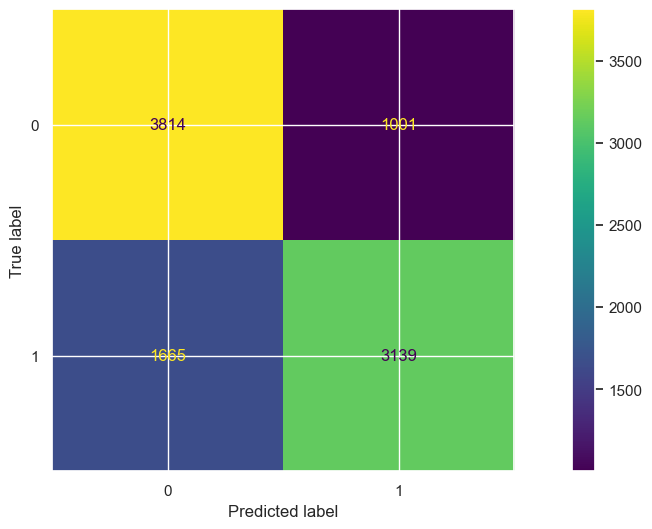

In [93]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [97]:
# Bagging 
bagging = BaggingClassifier(logastic,n_estimators=150,m)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=150)

In [98]:
bagging.score(X_train,y_train)

0.6919818063677713

In [99]:
y_predict = bagging.predict(X_test)

In [100]:
accuracy_score(y_predict,y_test)

0.696953945316561

In [101]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      5006
           1       0.68      0.70      0.69      4613

    accuracy                           0.70      9619
   macro avg       0.70      0.70      0.70      9619
weighted avg       0.70      0.70      0.70      9619



In [109]:
## Gridentboosting
boosting = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=8)

In [110]:
boosting.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=300)

In [111]:
boosting.score(X_train,y_train)

0.9076023391812865

In [112]:
y_predict = boosting.predict(X_test)

In [113]:
accuracy_score(y_predict,y_test)

0.8537269986485082

In [114]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4952
           1       0.84      0.86      0.85      4667

    accuracy                           0.85      9619
   macro avg       0.85      0.85      0.85      9619
weighted avg       0.85      0.85      0.85      9619



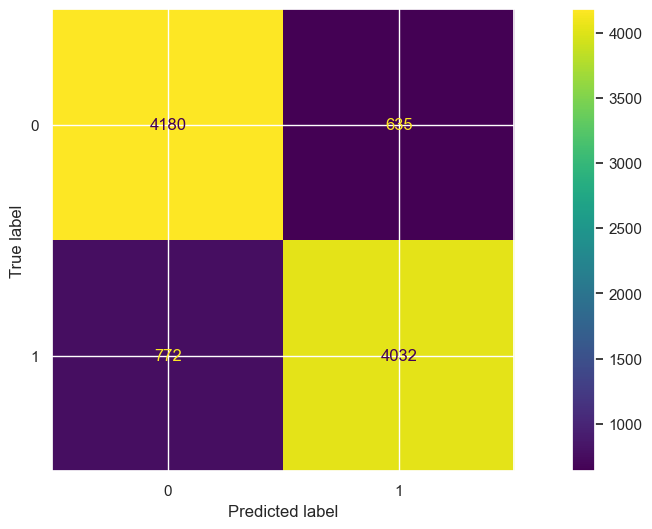

In [115]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [118]:
# knerioust nabour
nabour = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree')
nabour.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [119]:
nabour.score(X_train,y_train)

0.8521637426900585

In [120]:
y_predict = nabour.predict(X_test)

In [121]:
accuracy_score(y_predict,y_test)

0.8265932009564404

In [122]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5305
           1       0.78      0.86      0.82      4314

    accuracy                           0.83      9619
   macro avg       0.83      0.83      0.83      9619
weighted avg       0.83      0.83      0.83      9619



In [124]:
# XBBooster
xg = XGBClassifier(n_estimators=200,max_depth=10)
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
xg.score(X_train,y_train)

0.9069525666016894

In [127]:
y_predict = xg.predict(X_test)

In [128]:
accuracy_score(y_predict,y_test)

0.8570537477908307

In [129]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4964
           1       0.84      0.87      0.85      4655

    accuracy                           0.86      9619
   macro avg       0.86      0.86      0.86      9619
weighted avg       0.86      0.86      0.86      9619



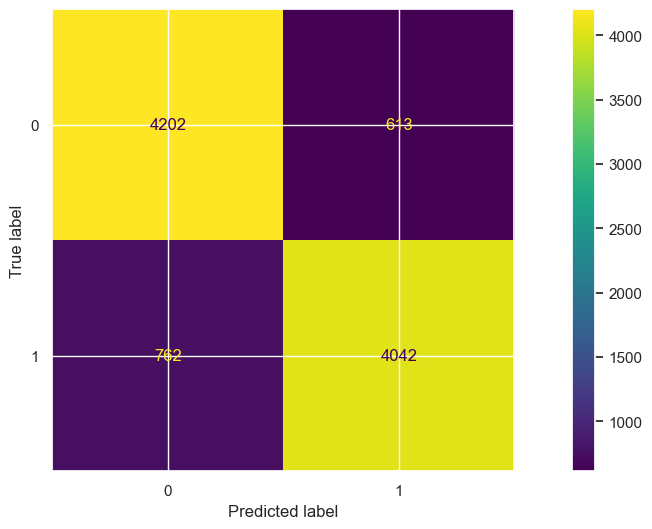

In [130]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()